<a href="https://colab.research.google.com/github/salimNabbout/Qualidade_Vinhos_Norte_Portugal/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [38]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as keras




Carregando o dataset

In [39]:
dataset = tf.keras.datasets.cifar10
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [40]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

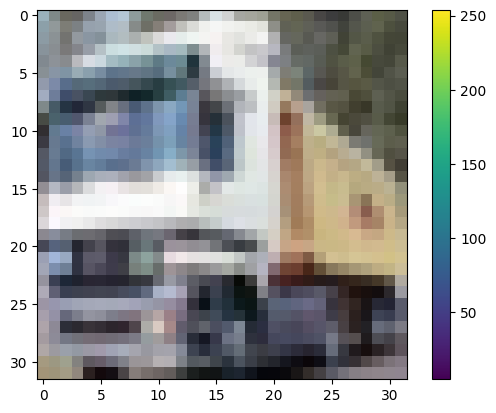

In [41]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Avião', 'Automóvel', 'Passaro',
                           'Gato', 'Cervo', 'Cachorro', 'Sapo',
                           'Cavalo', 'Enviar', 'Caminhão']

plt.imshow(imagens_treino[1])
plt.colorbar()

Normalizando as imagens

In [42]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [43]:
import tensorflow as tf
from tensorflow import keras

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize the pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create the model
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

parando_cedo = [
    keras.callbacks.EarlyStopping(monitor='val_loss'),
    keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                    monitor='val_loss', save_best_only=True)
]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(train_images, train_labels,
                       batch_size=480,
                       epochs=10,
                       validation_split=0.2,
                       callbacks=parando_cedo)


Epoch 1/10
84/84 [==============================] - 4s 43ms/step - loss: 2.1360 - accuracy: 0.2413 - val_loss: 1.9247 - val_accuracy: 0.3294
Epoch 2/10
84/84 [==============================] - 3s 35ms/step - loss: 1.8981 - accuracy: 0.3193 - val_loss: 1.8344 - val_accuracy: 0.3571
Epoch 3/10
84/84 [==============================] - 4s 43ms/step - loss: 1.8356 - accuracy: 0.3445 - val_loss: 1.7753 - val_accuracy: 0.3756
Epoch 4/10
84/84 [==============================] - 3s 34ms/step - loss: 1.8037 - accuracy: 0.3582 - val_loss: 1.7635 - val_accuracy: 0.3837
Epoch 5/10
84/84 [==============================] - 3s 37ms/step - loss: 1.7649 - accuracy: 0.3722 - val_loss: 1.7303 - val_accuracy: 0.3943
Epoch 6/10
84/84 [==============================] - 3s 36ms/step - loss: 1.7531 - accuracy: 0.3757 - val_loss: 1.7116 - val_accuracy: 0.4002
Epoch 7/10
84/84 [==============================] - 3s 40ms/step - loss: 1.7297 - accuracy: 0.3852 - val_loss: 1.6953 - val_accuracy: 0.4037
Epoch 8/10
84

Sumário do Modelo

In [44]:
sumario_do_modelo = modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               786688    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [45]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.03431923, -0.0239369 ,  0.05202669, ..., -0.04728982,
        -0.04822081,  0.03831107],
       [ 0.02198214, -0.02000815, -0.03309191, ..., -0.01171699,
         0.0144589 , -0.03972193],
       [-0.04189834,  0.02461027, -0.09360463, ...,  0.03762076,
        -0.0221085 , -0.01331018],
       ...,
       [-0.02071987, -0.01894969,  0.01697741, ...,  0.04171319,
        -0.01381431,  0.01617919],
       [ 0.02576184, -0.03042309, -0.02615297, ..., -0.0024839 ,
         0.00982556, -0.02066596],
       [ 0.01817303, -0.00580138, -0.00481897, ...,  0.03477029,
        -0.01685277,  0.03849276]], dtype=float32)

In [46]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((3072, 256))

pesos_camada_dense_aleatorios = np.random.rand(3072, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()

[array([[0.88959515, 0.05301506, 0.03310473, ..., 0.33323985, 0.775716  ,
         0.37735492],
        [0.73197156, 0.29259044, 0.17861167, ..., 0.38312185, 0.5248831 ,
         0.7981702 ],
        [0.7241853 , 0.5028868 , 0.5239562 , ..., 0.01419935, 0.42732924,
         0.56623   ],
        ...,
        [0.6390518 , 0.5351948 , 0.5016284 , ..., 0.7854913 , 0.34701857,
         0.4990945 ],
        [0.87775403, 0.69584805, 0.14686416, ..., 0.97883093, 0.20470299,
         0.33535773],
        [0.73550165, 0.49084046, 0.9877295 , ..., 0.8588967 , 0.87755686,
         0.37408063]], dtype=float32),
 array([ 0.00073186, -0.00370655, -0.00607593, -0.00600142, -0.00569835,
        -0.00558969, -0.00187165, -0.00207449,  0.1191828 , -0.00427979,
        -0.00508604, -0.00293589, -0.00604342, -0.00533848, -0.00591554,
        -0.00600469, -0.00175174, -0.00600387, -0.00442745, -0.00905359,
         0.0821158 , -0.00545648, -0.00600455, -0.00186164, -0.00352529,
        -0.00667814, -0.00598

In [47]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 12s 9ms/step - loss: 475.6908 - accuracy: 0.1202 - val_loss: 77.4109 - val_accuracy: 0.1845
Epoch 2/5
1250/1250 [==============================] - 12s 9ms/step - loss: 103.0132 - accuracy: 0.1503 - val_loss: 29.6896 - val_accuracy: 0.1642
Epoch 3/5
1250/1250 [==============================] - 10s 8ms/step - loss: 29.4147 - accuracy: 0.1449 - val_loss: 23.9473 - val_accuracy: 0.1416
Epoch 4/5
1250/1250 [==============================] - 12s 10ms/step - loss: 16.4472 - accuracy: 0.1489 - val_loss: 6.6284 - val_accuracy: 0.1650
Epoch 5/5
1250/1250 [==============================] - 13s 10ms/step - loss: 6.8359 - accuracy: 0.1765 - val_loss: 3.9251 - val_accuracy: 0.1769


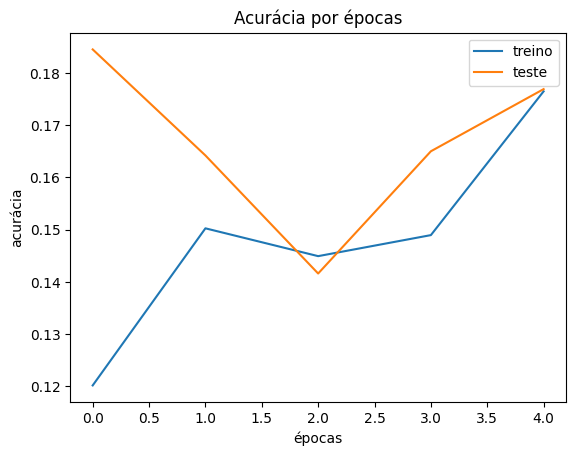

In [48]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'teste'])


In [49]:
modelo.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_2_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_2',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 32, 32, 3),
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_2',
    'trainable': True,
    'dtype': 'float3

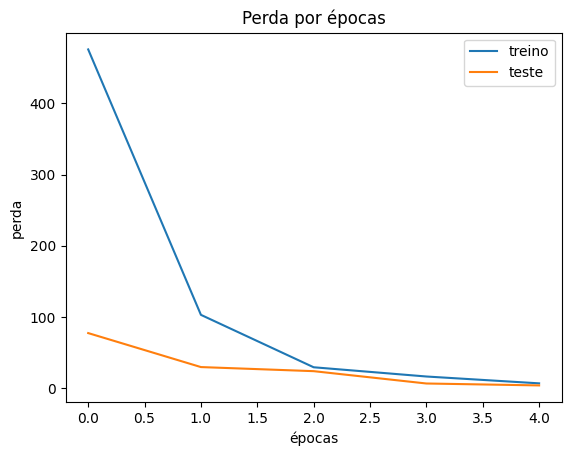

In [50]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'teste'])

In [51]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

Salvando e carregando o modelo treinado

In [52]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

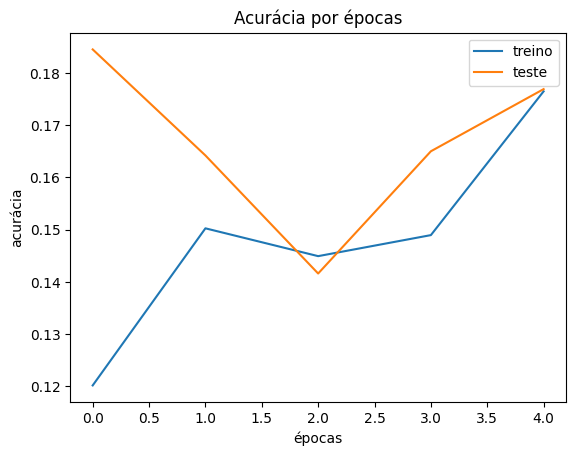

In [53]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'teste'])


Testando o modelo e o modelo salvo

In [57]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 3ms/step
resultado teste: 9
número da imagem de teste: [8]
313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 9
número da imagem de teste: [8]


Avaliando o modelo

In [56]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 839.2505 - accuracy: 0.1794
Perda do teste: 839.25048828125
Acurácia do teste: 0.1793999969959259
